In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import h5py

sys.path.append("..")
from dm21cm.utils import load_h5_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [10]:
abscs = load_h5_dict("../data/abscissas/abscs_230629xc.h5")

In [3]:
os.environ['DM21CM_DATA_DIR']

'/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data'

In [8]:
! ls /n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/230629

elec	     elec_scat.h5  phot_dep.h5	 phot_prop_diag.h5  phot_scat.h5
elec_dep.h5  phot	   phot_phot.h5  phot_prop.h5


In [23]:
with h5py.File(f"{os.environ['DM21CM_DATA_DIR']}/tf/230629xc/phot_scat.h5") as hf:
    axes = hf['axes'][()]
    scat_tf = hf['data'][()]

In [24]:
axes

array([b'rs', b'Ein', b'nBs', b'x', b'out'], dtype=object)

In [30]:
with h5py.File(f"{os.environ['DM21CM_DATA_DIR']}/tf/230629/phot_dep.h5") as hf:
    axes = hf['axes'][()]
    dep_tf = hf['data'][()]

In [28]:
with h5py.File(f"{os.environ['DM21CM_DATA_DIR']}/tf/230629xc/phot_dep.h5") as hf:
    new_dep_tf = hf['data'][()]

In [21]:
i_x_lo = np.searchsorted(abscs['photE'], 100)
i_x_hi = np.searchsorted(abscs['photE'], 10000)

[]

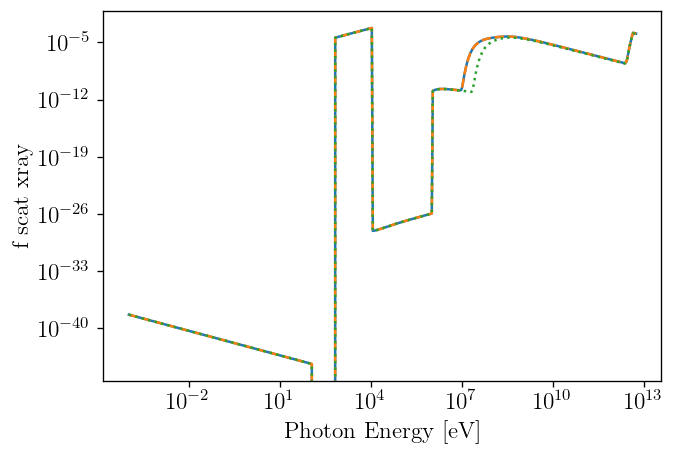

In [33]:
plt.plot(abscs['photE'], dep_tf[5, :, 5, 5, -1] / abscs['photE'])
plt.plot(abscs['photE'], np.dot(scat_tf[5, :, 5, 5, i_x_lo:i_x_hi], abscs['photE'][i_x_lo:i_x_hi]) / abscs['photE'], '--')
plt.plot(abscs['photE'], new_dep_tf[5, :, 5, 5, -1] / abscs['photE'], ':')
plt.xlabel("Photon Energy [eV]")
plt.ylabel("f scat xray")
plt.loglog()

In [25]:
i_x_lo_new = np.searchsorted(abscs['photE'], 500)
i_x_hi_new = np.searchsorted(abscs['photE'], 10000)

In [26]:
for i_r in range(10):
    for i_x in range(10):
        for i_n in range(10):
            dep_tf[i_r, :, i_n, i_x, -1] = np.dot(
                scat_tf[i_r, :, i_n, i_x, i_x_lo_new:i_x_hi_new],
                abscs['photE'][i_x_lo_new:i_x_hi_new]
            )

In [11]:
def save_aad(filename, axes, axes_abscs_keys, data):
    # use global abscs
    with h5py.File(filename, 'w') as hf:
        hf.create_dataset('axes', data=np.array(axes, dtype=h5py.string_dtype()))
        hf_abscs = hf.create_group('abscs')
        for axis, key in zip(axes, axes_abscs_keys):
            hf_abscs.create_dataset(axis, data=abscs[key])
        hf.create_dataset('data', data=data)

In [27]:
save_aad(
    f"{os.environ['DM21CM_DATA_DIR']}/tf/230629xc/phot_dep.h5",
    ['rs', 'Ein', 'nBs', 'x', 'out'],
    ['rs', 'photE', 'nBs', 'x', 'dep_c'],
    dep_tf
)